# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [204]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [205]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
### Question 1. How many observations are in our dataset?


In [206]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### Answer: 
400

### Question 2. Create a summary table.

In [207]:
df_raw.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [208]:
gre_counts = df_raw.gre.dropna().unique()
gre_counts

array([ 380.,  660.,  800.,  640.,  520.,  760.,  560.,  400.,  540.,
        700.,  440.,  480.,  780.,  360.,  500.,  600.,  680.,  620.,
        580.,  460.,  740.,  300.,  720.,  340.,  420.,  220.])

In [209]:
df_raw.admit.unique()

array([0, 1])

In [210]:
df_accept = df_raw[df_raw.admit == 1]
df_accept.count()

admit       127
gre         127
gpa         126
prestige    126
dtype: int64

In [211]:
df_deny = df_raw[df_raw.admit == 0]

df_deny.count()

admit       273
gre         271
gpa         272
prestige    273
dtype: int64

*check: 273 + 127 = 400* 

In [212]:
df_raw.admit.unique()

array([0, 1])

In [213]:
for gre_count in np.sort(gre_counts):
    admit_count = (df_accept.gre == gre_count).sum()
    print '{} accepted applicants have a GRE score of {}'.format(admit_count, gre_count)

0 accepted applicants have a GRE score of 220.0
1 accepted applicants have a GRE score of 300.0
1 accepted applicants have a GRE score of 340.0
0 accepted applicants have a GRE score of 360.0
0 accepted applicants have a GRE score of 380.0
2 accepted applicants have a GRE score of 400.0
0 accepted applicants have a GRE score of 420.0
2 accepted applicants have a GRE score of 440.0
4 accepted applicants have a GRE score of 460.0
6 accepted applicants have a GRE score of 480.0
2 accepted applicants have a GRE score of 500.0
10 accepted applicants have a GRE score of 520.0
9 accepted applicants have a GRE score of 540.0
6 accepted applicants have a GRE score of 560.0
6 accepted applicants have a GRE score of 580.0
9 accepted applicants have a GRE score of 600.0
12 accepted applicants have a GRE score of 620.0
5 accepted applicants have a GRE score of 640.0
12 accepted applicants have a GRE score of 660.0
9 accepted applicants have a GRE score of 680.0
5 accepted applicants have a GRE scor

In [214]:
df_accept.gre.mode()

0    620.0
1    660.0
dtype: float64

In [215]:
df_accept.describe()

,admit,gre,gpa,prestige
count,127.0,127.000000,126.000000,126.000000
mean,1.0,618.897638,3.489206,2.150794
std,0.0,108.884884,0.371655,0.921455
min,1.0,300.000000,2.420000,1.000000
25%,1.0,540.000000,3.220000,1.000000
50%,1.0,620.000000,3.545000,2.000000
75%,1.0,680.000000,3.757500,3.000000
max,1.0,800.000000,4.000000,4.000000


In [216]:
df_deny.gre.mode()

0    580.0
dtype: float64

In [217]:
df_deny.describe()

,admit,gre,gpa,prestige
count,273.0,271.000000,272.000000,273.000000
mean,0.0,573.579336,3.345404,2.641026
std,0.0,116.052798,0.376773,0.917198
min,0.0,220.000000,2.260000,1.000000
25%,0.0,500.000000,3.080000,2.000000
50%,0.0,580.000000,3.340000,3.000000
75%,0.0,660.000000,3.610000,3.000000
max,0.0,800.000000,4.000000,4.000000


### Question 3. Why would GRE have a larger STD than GPA?

#### Answer: 

Larger values for GRE (200-800) than GPA (0-4)

In [218]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [219]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


### Question 4. Drop data points with missing data.


**Count the # of observations in the dataset = 400:**

In [220]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [221]:
len(df_raw)

400

**Counting the number of nan values for GRE:**

In [222]:
df_raw.gre.isnull().sum()

2

In [223]:
df_raw.gre.unique()

array([ 380.,  660.,  800.,  640.,  520.,  760.,  560.,  400.,  540.,
        700.,  440.,  480.,  780.,  360.,  500.,  600.,  680.,  620.,
        580.,  460.,  740.,  300.,  720.,  340.,  420.,   nan,  220.])

In [224]:
df_raw.min()

admit         0.00
gre         220.00
gpa           2.26
prestige      1.00
dtype: float64

**Dropping nan GRE values:**

In [225]:
df_raw.drop(df_raw[df_raw.gre.isnull()].index, inplace = True)

**REPEAT FOR GPA & Prestige**

In [226]:
df_raw[df_raw.gpa.isnull()]

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


In [227]:
len(df_raw.gpa)

398

In [228]:
df_raw[df_raw.prestige.isnull()]

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


In [229]:
df_raw.drop([236], axis = 0, inplace = True)


### Question 5. Confirm tht you dropped the correct data.  How can you tell?

#### Answer: 

check the counts and unique values as well as that line of data

In [230]:
df_raw.gre.isnull().sum()

0

In [231]:
len(df_raw.gre)

397

In [262]:
df_raw[df_raw.prestige.isnull()]

,admit,gre,gpa,prestige


In [264]:
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

### Question 6. Create box plots for GRE and GPA.

#### Boxplot for GRE:

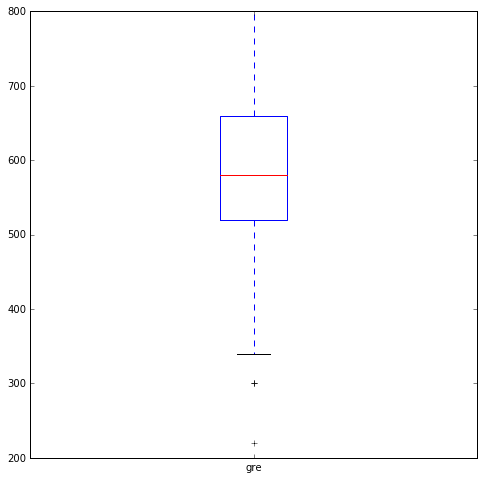

In [233]:
df_raw.gre.plot(kind = 'box', figsize = (8, 8))

#### Boxplot for GPA:

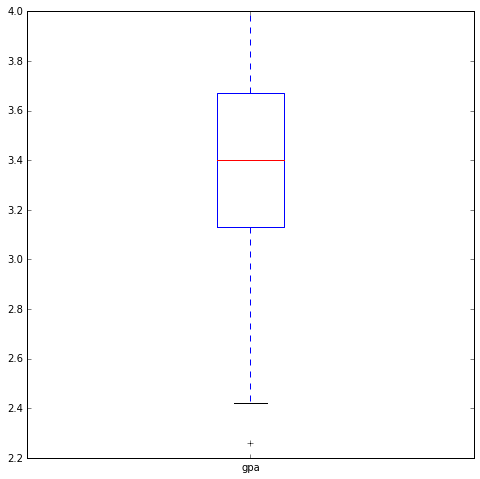

In [234]:
df_raw.gpa.plot(kind = 'box', figsize = (8, 8))

### Question 7. What do this plots show?

#### Answer: 

GRE Boxplot: 25% of applicants have a GRE score of 350-520; 25% 520-580; 25% 580-660; 25% 660-800. outliers inlclude a score of 220. 


GPA Boxplot:  Median score acrosss all applicants was 3.4 with a 1 point difference in min score and a .6 point difference in max score; also have an outlier with a gpa of 2.3. 25% of the applicants had a gpa of 3.7-4.0; 25% 3.4-3.7; 25% with 3.1-3.4; 25% with 2.4-3.1 gpa. 

*check:*

In [235]:
df_raw.gre.min()

220.0

In [236]:
df_raw.gre.max()

800.0

In [237]:
df_raw.gre.quantile(.25)

520.0

In [238]:
df_raw.gre.quantile(.50)

580.0

In [239]:
df_raw.gre.quantile(.75)

660.0

In [240]:
df_raw.gpa.min()

2.2599999999999998

In [241]:
df_raw.gpa.quantile(.25)

3.1299999999999999

In [242]:
df_raw.gpa.quantile(.5)

3.3999999999999999

In [243]:
df_raw.gpa.quantile(.75)

3.6699999999999999

In [244]:
df_raw.gpa.max()

4.0

In [245]:
df_raw[df_raw.gpa == df_raw.gpa.min()]

,admit,gre,gpa,prestige
289,0,420.0,2.26,4.0


### Question 8. Describe each distribution.

In [246]:
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


**Looking at ALL GPA applicant data:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127214c50>]], dtype=object)

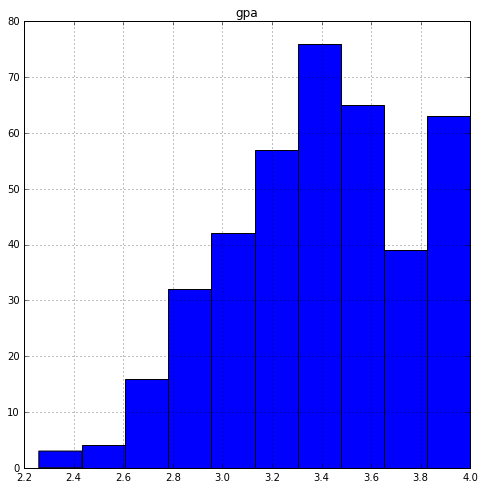

In [247]:
df_raw.hist(column="gpa",       
              figsize=(8,8),         
              color="blue",
         )           

**Looking at all ACCEPTED GPA data:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1276bbf90>]], dtype=object)

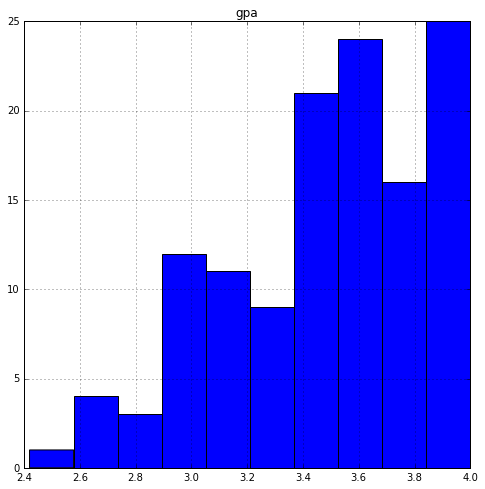

In [248]:
df_accept.hist(column="gpa",       
              figsize=(8,8),         
              color="blue",
         )           

**Looking at all GPA data of applicants who were DENIED:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126f92b90>]], dtype=object)

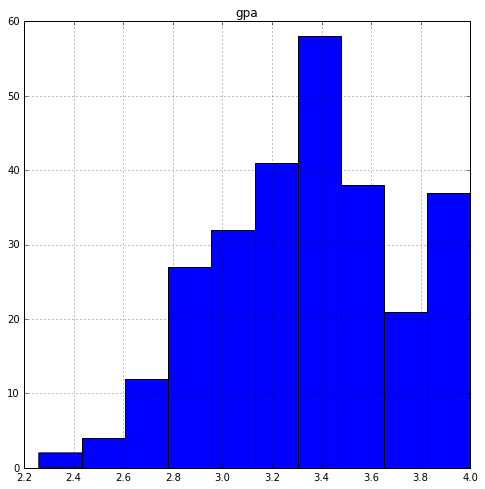

In [249]:
df_deny.hist(column="gpa",       
              figsize=(8,8),         
              color="blue",
         )           

**Looking at ALL GRE applicant data:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128578510>]], dtype=object)

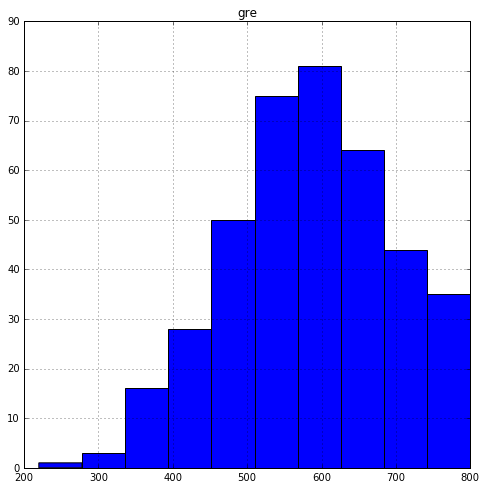

In [250]:
df_raw.hist(column="gre",       
              figsize=(8,8),         
              color="blue",
         )      

**Looking at all GRE data of students who were ACCEPTED:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1285e0390>]], dtype=object)

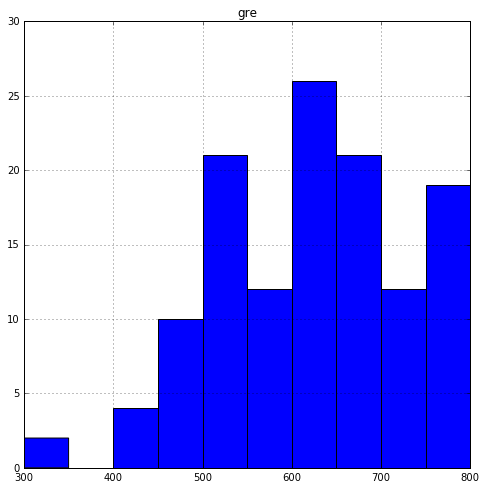

In [251]:
df_accept.hist(column="gre",       
              figsize=(8,8),         
              color="blue",
         )           

**Looking at all GRE data of applicants who were DENIED:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1283a4a50>]], dtype=object)

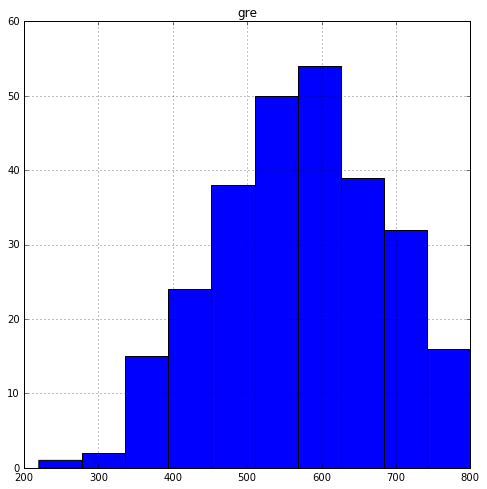

In [252]:
df_deny.hist(column="gre",       
              figsize=(8,8),         
              color="blue",
         )   

**All Applicants:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128e1d790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1292f1ed0>]], dtype=object)

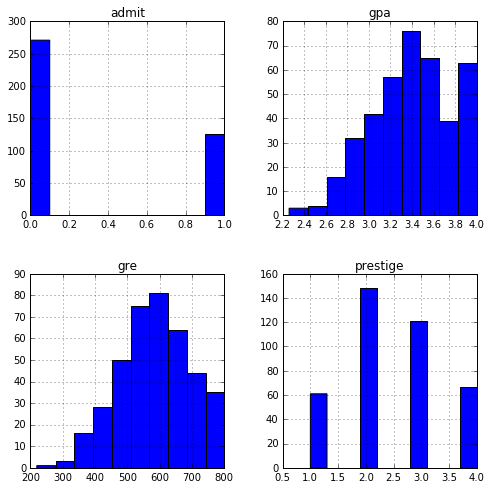

In [253]:
df_raw.hist(  
              figsize=(8,8),         
              color="blue",
         )   

**Accepted Applicants:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1293dcad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12994b050>]], dtype=object)

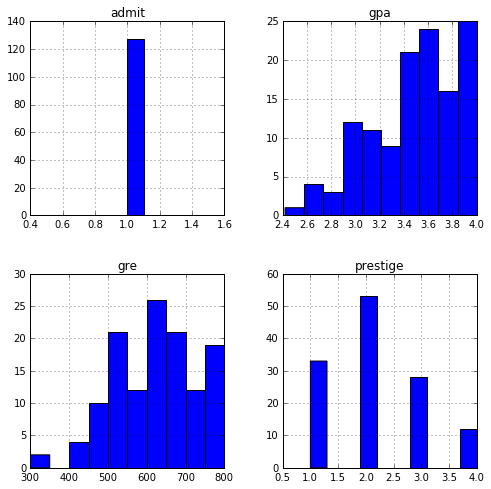

In [254]:
df_accept.hist(      
              figsize=(8,8),         
              color="blue",
         )   

**Denied Applicants:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129dd2490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a0badd0>]], dtype=object)

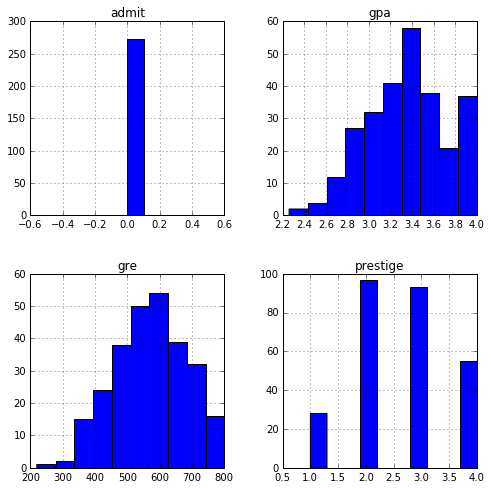

In [255]:
df_deny.hist(      
              figsize=(8,8),         
              color="blue",
         )   

### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

#### Answer: 

YES when looking at GRE data but NO for GPA - normal distribution: data has a central value, around which most values are likely to occur; as you move away from the central values, the frequency /likihood of those values occuring decreases.


### Question 10. Does this distribution need correction?  If so, why?  How?

#### Answer: 

Remove any outliers: 1.5 * IQR above 3Q or 1.5 * IQR below Q1

In [256]:
Q1 = df_raw.gpa.quantile(0.25)
Q3 = df_raw.gpa.quantile(0.75)

IQR = Q3 - Q1

IQR

0.54000000000000004

### Question 11. Which of our variables are potentially colinear?

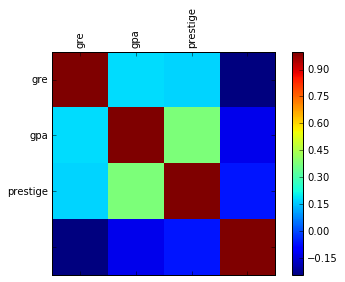

In [257]:
corr = df_raw.corr()

figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(df_raw.corr()))
subplot.set_xticklabels(corr.columns, rotation = 90)
subplot.set_yticklabels(corr.columns)
plt.show()

In [258]:
df_raw.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [259]:
df_accept.corr()


,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.232765,-0.080485
gpa,NaN,0.232765,1.000000,-0.039360
prestige,NaN,-0.080485,-0.039360,1.000000


In [260]:
df_deny.corr()

,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.418175,-0.086004
gpa,NaN,0.418175,1.000000,-0.006996
prestige,NaN,-0.086004,-0.006996,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a7190d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b1c1050>]], dtype=object)

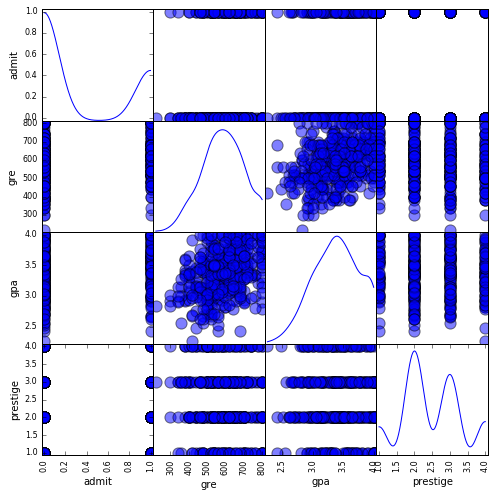

In [261]:
pd.tools.plotting.scatter_matrix(df_raw, diagonal = 'kde', s = 500, figsize = (8, 8))

### Question 12. What did you find?

#### Answer: 
Admitance & prestige have a negative coorleation.  The closest correlation is between GRE score and GPA score.  When looking at accept data & deny data, GRE & GPA have a higher coorelation for students who were denied than those accepted. 

### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

#### Answer:  
Look at the validity of assocations - when and how prestige and acceptance / rejection occur.  Look at assocaitions with variables of prestige - what detmines the prestige rating of a school - to see if there is any bias or if there is a seperate variable that affects admition rates. 

### Question 14. What is your hypothesis?

#### Answer: 

UCLA grad school applicants are less likely to be applying from higher prestige schools (ranked 4); however, grad school admissions are less likely to accept a student from a school with a higher pretsige ranking (i.e. 4) due to the lack of selection bias (prestige is not seen as correlated to intelligence). 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.